In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [7]:
df = pd.read_json('../Dataset_Clean.json')

In [8]:
label_columns = [f'A_{i}' for i in range(1, 8)]
all_l1_labels = []
all_l2_labels = []
hierarchical_pairs = []

for col in label_columns:
    for label_list in df[col]:
        # Ensure the list is valid and has at least two elements
        if isinstance(label_list, list) and len(label_list) >= 2:
            l1 = label_list[0]
            l2 = label_list[1]
            all_l1_labels.append(l1)
            all_l2_labels.append(l2)
            hierarchical_pairs.append((l1, l2))

print(f"Successfully processed {len(all_l1_labels)} total labels from {len(df)} samples.")
print(f"Found {len(set(all_l1_labels))} unique L1 categories.")
print(f"Found {len(set(all_l2_labels))} unique L2 sub-categories.")

# Create a DataFrame for hierarchical plotting
hierarchical_df = pd.DataFrame(hierarchical_pairs, columns=['L1_Category', 'L2_Category'])

Successfully processed 13545 total labels from 1935 samples.
Found 3 unique L1 categories.
Found 9 unique L2 sub-categories.


In [9]:
pd.Series(all_l1_labels).unique()

array(['Account Management', 'Technical Issue', 'Billing'], dtype=object)

In [10]:
pd.Series(all_l2_labels).unique()

array(['Password Reset', 'Feature Bug', 'Refund Request',
       'Update Personal Info', 'Performance Issue', 'Close Account',
       'Invoice Inquiry', 'Login Issue', 'Unrecognized Charge'],
      dtype=object)

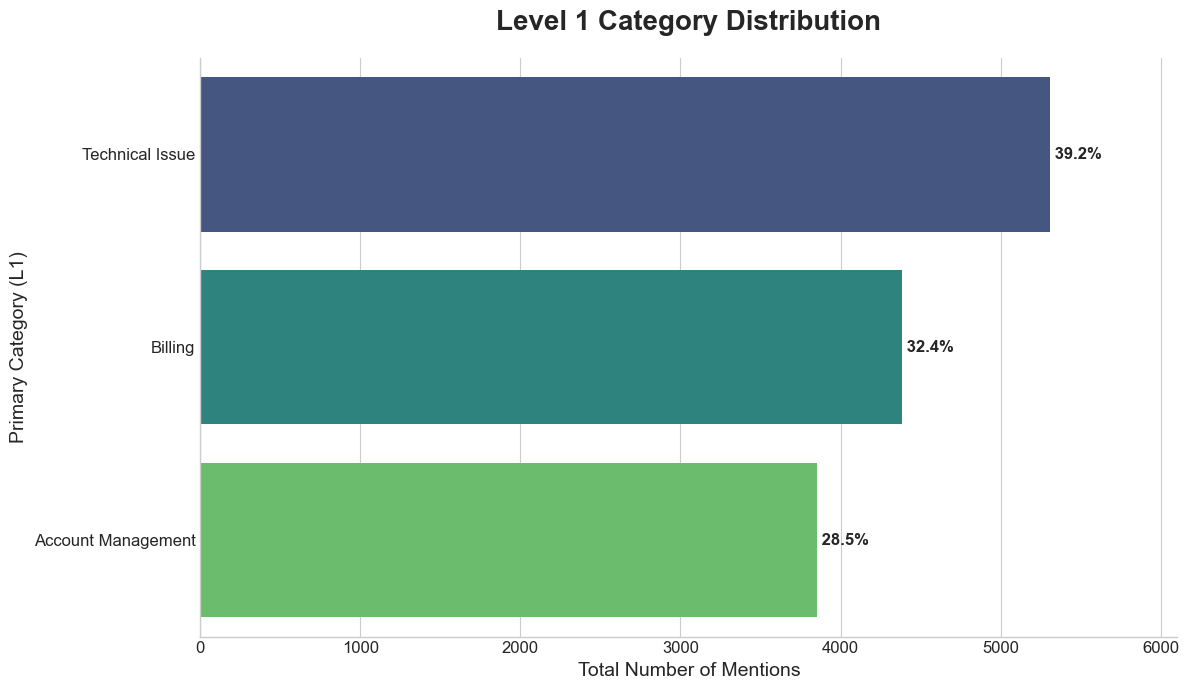

In [15]:
# --- Count and prepare the L1 data for plotting ---
l1_counts = Counter(all_l1_labels)
l1_df = pd.DataFrame(l1_counts.most_common(), columns=['Category', 'Volume'])

# --- Create the Professional Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot bars
barplot = sns.barplot(x='Volume', y='Category', data=l1_df, palette='viridis', ax=ax, hue='Category', legend=False)

# --- Title and Labels ---
ax.set_title('Level 1 Category Distribution', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('Total Number of Mentions', fontsize=14)
ax.set_ylabel('Primary Category (L1)', fontsize=14)

# --- Annotations and Styling ---
ax.tick_params(axis='both', which='major', labelsize=12)
sns.despine()

# Add percentage labels to each bar for clarity
total_volume = l1_df['Volume'].sum()
for p in ax.patches:
    width = p.get_width()
    percentage = f'{(width / total_volume) * 100:.1f}%'
    ax.text(width, p.get_y() + p.get_height() / 2,
            f' {percentage}',
            va='center', fontsize=12, weight='bold')

# Set the x-axis limit to give space for the labels
ax.set_xlim(0, l1_df['Volume'].max() * 1.15)

plt.tight_layout()
plt.show()

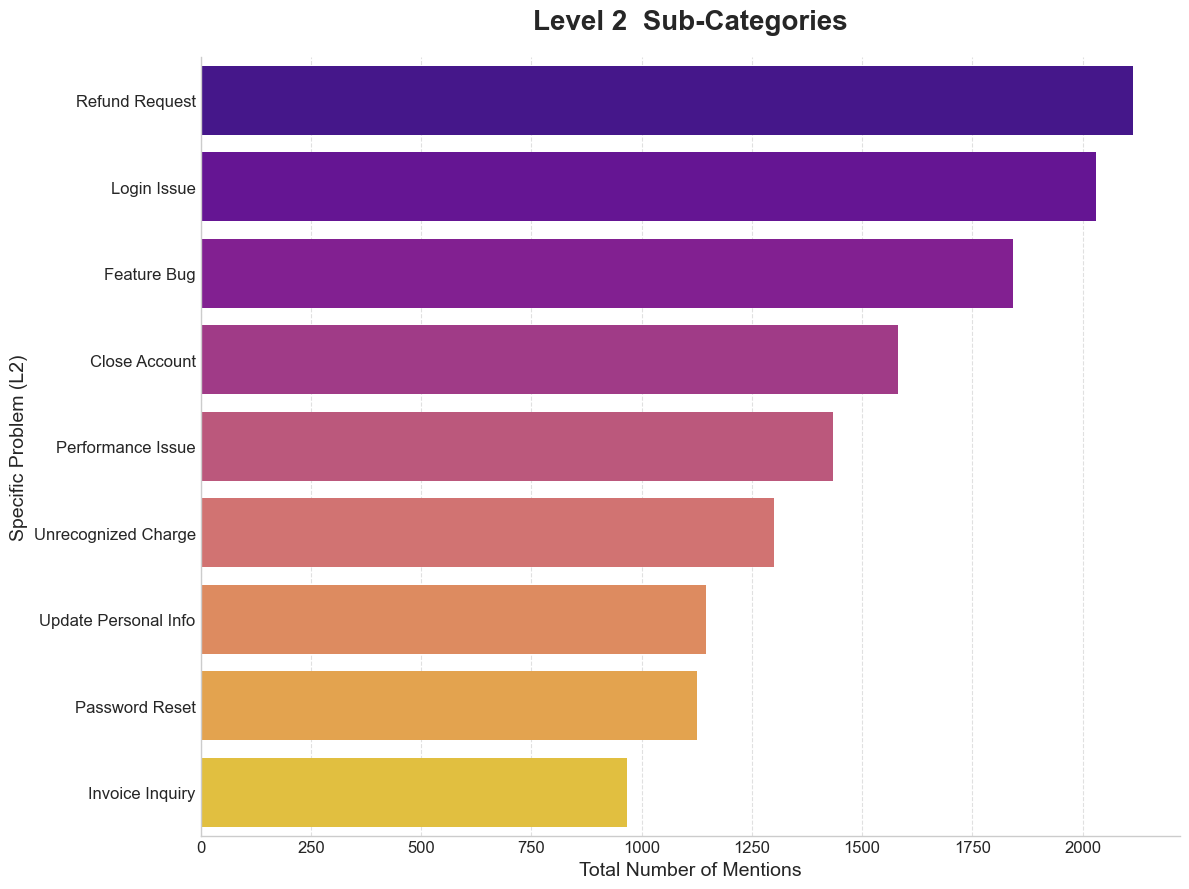

In [16]:
# --- Count and prepare the L2 data for plotting ---
l2_counts = Counter(all_l2_labels)
# We'll plot the top 15 most common issues to keep the chart clean
l2_df = pd.DataFrame(l2_counts.most_common(15), columns=['Sub-Category', 'Volume'])

# --- Create the Professional Visualization ---
fig, ax = plt.subplots(figsize=(12, 9))

# Plot bars
sns.barplot(x='Volume', y='Sub-Category', data=l2_df, palette='plasma', ax=ax, hue="Sub-Category")

# --- Title and Labels ---
ax.set_title('Level 2  Sub-Categories', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('Total Number of Mentions', fontsize=14)
ax.set_ylabel('Specific Problem (L2)', fontsize=14)

# --- Annotations and Styling ---
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine()

plt.tight_layout()
plt.show()